Top 3 Restaurants based on Ratings :

Doordash : 
- doordash/doordash_top_3_pizza.json
- doordash/doordash_top_3_sushi.json
- doordash/doordash_top_3_burger.json

UberEats :
- Uber Eats/top_3_pizza.json
- Uber Eats/top_3_sushi.json
- Uber Eats/top_3_burgers.json

GrubHub :
- grubhub/top_rated_pizza.json
- grubhub/top_rated_sushi.json
- grubhub/top_rated_burger.json

In [136]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
dish = input("Choose from 3 dishes - pizza, burger, sushi: ").strip().lower()

valid_dishes = ["pizza", "burger", "sushi"]
if dish not in valid_dishes:
    print("Invalid choice. Please choose from pizza, burger, or sushi.")
else:
    file_path1 = f"doordash/doordash_top_3_{dish}.json"
    file_path2 = f"Uber Eats/top_3_{dish}.json"
    file_path3 = f"grubhub/top_rated_{dish}.json"

    try:
        # Doordash
        with open(file_path1, "r", encoding="utf-8") as file:
            data1 = json.load(file)
        top_ratings1 = data1.get("top_ratings", [])
        df_doordash = pd.DataFrame(top_ratings1)

        # UberEats
        with open(file_path2, "r", encoding="utf-8") as file:
            data2 = json.load(file)
        top_ratings2 = data2.get("top_3_by_rating", [])
        df_ubereats = pd.DataFrame(top_ratings2)

        # GrubHub
        with open(file_path3, "r", encoding="utf-8") as file:
            data3 = json.load(file)
        top_ratings3 = data3.get("top_5_rated_restaurants", [])[0:3]
        df_grubhub = pd.DataFrame(top_ratings3)

        # Print confirmation
        print(f"Data loaded successfully for {dish} from all sources!")

    except FileNotFoundError as e:
        print(f"Error: {e}. Please ensure the correct files exist.")


Data loaded successfully for burger from all sources!


In [ ]:
# file_path1 = "doordash/doordash_top_3_pizza.json"
# file_path2 = "Uber Eats/top_3_sushi.json"
# file_path3 = "grubhub/top_rated_pizza.json"

# # Doordash
# with open(file_path1, "r", encoding="utf-8") as file:
#     data1 = json.load(file)

# top_ratings1 = data1.get("top_ratings", [])
# df_doordash = pd.DataFrame(top_ratings1)

# UberEats
# with open(file_path2, "r", encoding="utf-8") as file:
#     data2 = json.load(file)
# top_ratings2 = data2.get("top_3_by_rating", [])
# df_ubereats = pd.DataFrame(top_ratings2)

# # GrubHub
# with open(file_path3, "r", encoding="utf-8") as file:
#     data3 = json.load(file)
# top_ratings3 = data3.get("top_5_rated_restaurants", [])[0:3]
# df_grubhub = pd.DataFrame(top_ratings3)



In [123]:
df_doordash['delivery_time'] = df_doordash['delivery_time'].str.replace(' min', '').astype(int)
df_doordash['distance'] = df_doordash['distance'].str.replace(' mi', '', regex=False)
df_doordash['platform'] = 'Doordash'

print(df_doordash)

  restaurant_id             restaurant_name        type ratings no_of_ratings  \
0      26273153              Outpost Burger  Restaurant     4.8          500+   
1        802277                  Carl's Jr.  Restaurant     4.7           2k+   
2        240272  Tommy J's Grill & Catering  Restaurant     4.7           2k+   

  distance  delivery_time                                                URL  \
0      0.7             18  https://www.doordash.com/store/26273153?cursor...   
1      1.2             21  https://www.doordash.com/store/802277?cursor=e...   
2      0.9             27  https://www.doordash.com/store/240272?cursor=e...   

  menu  platform  
0   []  Doordash  
1   []  Doordash  
2   []  Doordash  


In [124]:
df_ubereats['distance'] = np.nan
df_ubereats['platform'] = 'UberEats'
print(df_ubereats)

          name                                               link  rating  \
0   Carl's Jr.  https://www.ubereats.com/store/carls-jr-1701-c...     4.7   
1  McDonald's®  https://www.ubereats.com/store/mcdonalds-4444-...     4.6   
2         IHOP  https://www.ubereats.com/store/ihop-cowell-blv...     4.6   

    reviews location     delivery_fee  delivery_time  \
0    (280+)      N/A  $0 delivery fee             10   
1  (3,000+)      N/A  $0 delivery fee           9999   
2    (500+)      N/A  $0 delivery fee           9999   

                                 categories and menu  distance  platform  
0  [Fast Food, Burgers, Salads, Burritos, America...       NaN  UberEats  
1  [American, Burgers, Fast Food, $, 4444 Chiles ...       NaN  UberEats  
2  [American, Breakfast and Brunch, burger, Comfo...       NaN  UberEats  


In [125]:
def extract_avg_time(time_estimate):
    if isinstance(time_estimate, dict) and "min" in time_estimate and "max" in time_estimate:
        return int(round((time_estimate["min"] + time_estimate["max"]) / 2))
    return time_estimate

df_grubhub["delivery_time"] = df_grubhub["delivery_time_estimate"].apply(extract_avg_time)
df_grubhub['platform'] = 'GrubHub'

In [126]:
print(df_grubhub)

  restaurant_id         name  pickup_available  delivery_available  rating  \
0       3032464   Burger Den             False                True     5.0   
1       2131972  Burger King             False                True     4.7   
2       3323926      Chili's             False                True     4.7   

   coupons_available  accepts_credit  accepts_cash distance_from_location  \
0              False           False         False                    9.1   
1              False           False         False                   1.17   
2              False           False         False                  15.43   

   delivery_time_estimate                                           cuisines  \
0  {'min': 25, 'max': 40}                 [Hamburgers, American, Vegetarian]   
1  {'min': 15, 'max': 30}  [Hamburgers, Fast Food, American, Dessert, San...   
2  {'min': 40, 'max': 55}  [Hamburgers, Hamburger, Chicken, Sandwiches, S...   

   delivery_time platform  
0             32  GrubHub  
1

In [127]:
df_doordash = df_doordash.rename(columns={
    "restaurant_name": "restaurant_name",
    "ratings": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance": "distance(mi)"
})

df_ubereats = df_ubereats.rename(columns={
    "name": "restaurant_name",
    "rating": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance": "distance(mi)"
})

df_grubhub = df_grubhub.rename(columns={
    "name": "restaurant_name",
    "rating": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance_from_location": "distance(mi)"
})

df_doordash_renamed = df_doordash[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]
df_ubereats_renamed = df_ubereats[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]
df_grubhub_renamed = df_grubhub[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]

combined_results = pd.concat([df_doordash_renamed, df_ubereats_renamed, df_grubhub_renamed], ignore_index=True)

print(combined_results)


              restaurant_name ratings  delivery_time(min) distance(mi)  \
0              Outpost Burger     4.8                  18          0.7   
1                  Carl's Jr.     4.7                  21          1.2   
2  Tommy J's Grill & Catering     4.7                  27          0.9   
3                  Carl's Jr.     4.7                  10          NaN   
4                 McDonald's®     4.6                9999          NaN   
5                        IHOP     4.6                9999          NaN   
6                  Burger Den     5.0                  32          9.1   
7                 Burger King     4.7                  22         1.17   
8                     Chili's     4.7                  48        15.43   

   platform  
0  Doordash  
1  Doordash  
2  Doordash  
3  UberEats  
4  UberEats  
5  UberEats  
6   GrubHub  
7   GrubHub  
8   GrubHub  


/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_92240/1163256429.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="platform", y="ratings", data=df, palette="Set2")


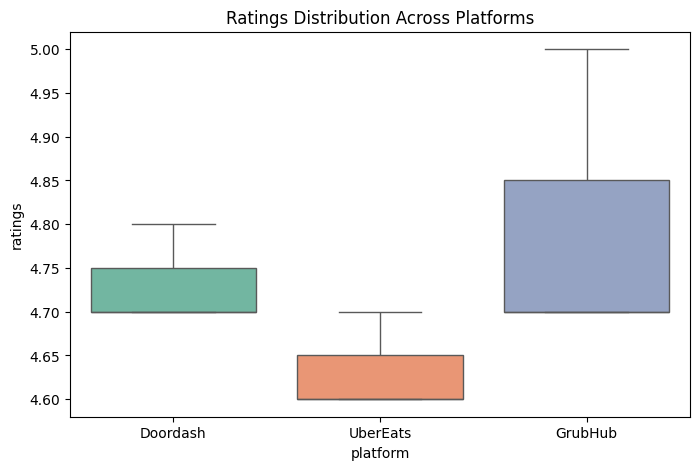

In [ ]:
# Visualizations

df = combined_results
df["delivery_time(min)"] = pd.to_numeric(df["delivery_time(min)"], errors="coerce")
df.loc[df["delivery_time(min)"] > 200, "delivery_time(min)"] = None 

# Ratings Distribution Across Platforms
plt.figure(figsize=(8, 5))
sns.boxplot(x="platform", y="ratings", data=df, palette="Set2")
plt.title("Ratings Distribution Across Platforms")
plt.show()


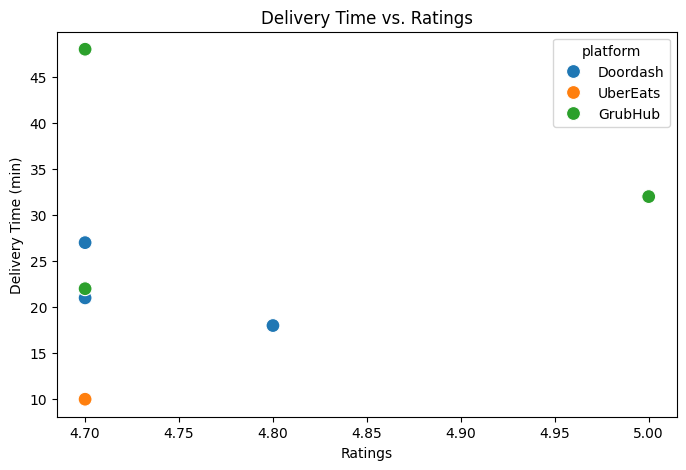

In [138]:
# Delivery Time vs. Ratings

plt.figure(figsize=(8, 5))
sns.scatterplot(x="ratings", y="delivery_time(min)", hue="platform", data=df, s=100)
plt.title("Delivery Time vs. Ratings")
plt.xlabel("Ratings")
plt.ylabel("Delivery Time (min)")
plt.show()

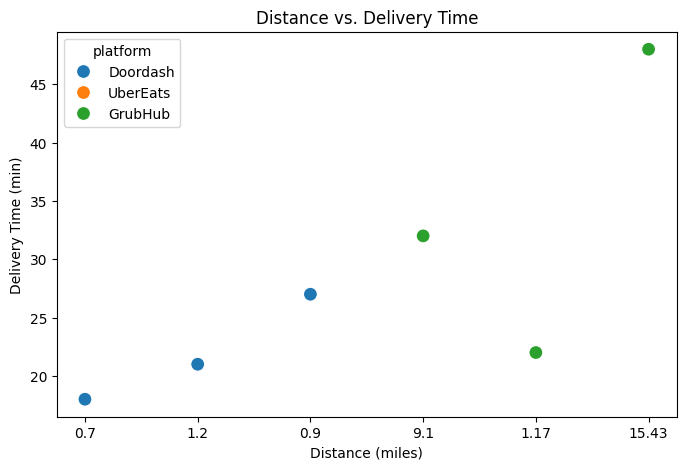

In [139]:
# Distance vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.scatterplot(x="distance(mi)", y="delivery_time(min)", hue="platform", data=df, s=100)
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance (miles)")
plt.ylabel("Delivery Time (min)")
plt.show()


/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_92240/2347672096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="coolwarm")


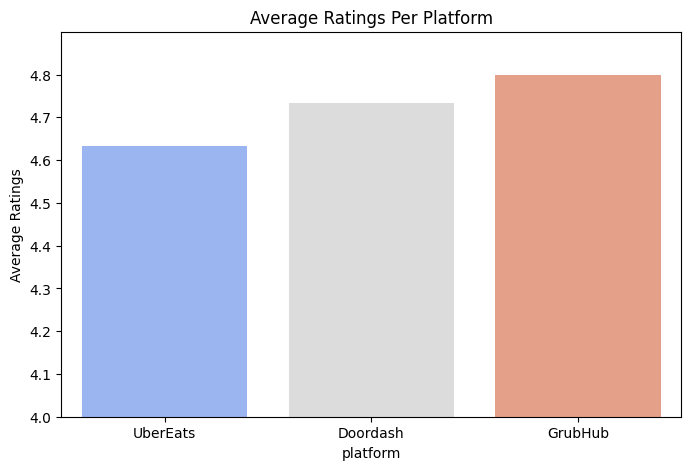

In [145]:
# Average Ratings Per Platform

plt.figure(figsize=(8, 5))

avg_ratings = df.groupby("platform")["ratings"].mean().sort_values()

sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="coolwarm")

plt.yticks(np.arange(4.0, avg_ratings.max() + 0.1, 0.1))

plt.title("Average Ratings Per Platform")
plt.ylabel("Average Ratings")
plt.ylim(4.0, avg_ratings.max() + 0.1)
plt.show()


In [128]:
combined_results['ratings'] = combined_results['ratings'].astype(float)

max_rating = combined_results['ratings'].max()

best_rated_restaurants = combined_results[combined_results['ratings'] == max_rating]

best_rated_restaurants_sorted = best_rated_restaurants.sort_values(by=['delivery_time(min)', 'distance(mi)'], 
                                                                    ascending=[True, True])

best_restaurant = best_rated_restaurants_sorted.iloc[0]

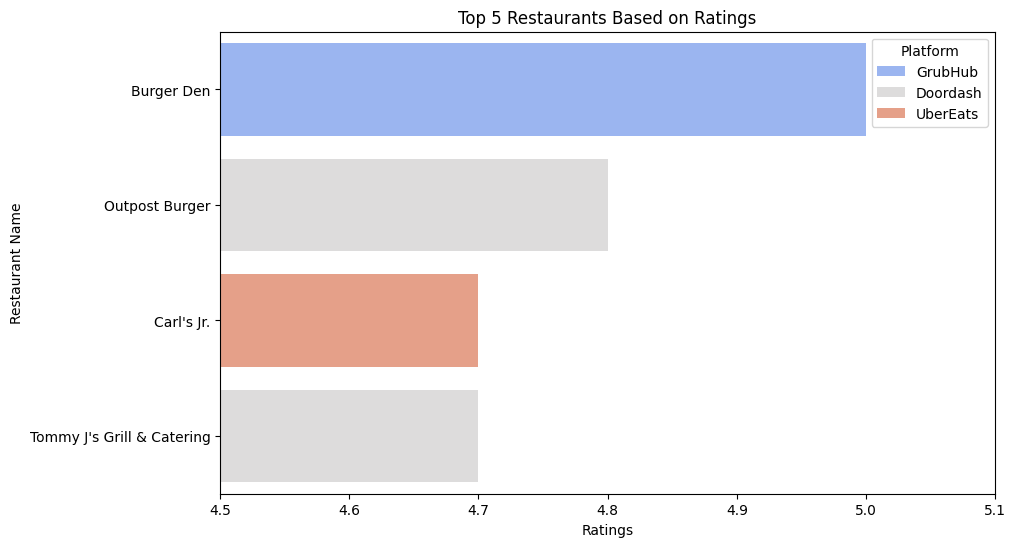

In [147]:
top_5 = combined_results.nlargest(5, "ratings")

plt.figure(figsize=(10, 6))

sns.barplot(x="ratings", y="restaurant_name", hue="platform", data=top_5, palette="coolwarm", dodge=False)

plt.xlabel("Ratings")
plt.ylabel("Restaurant Name")
plt.title("Top 5 Restaurants Based on Ratings")
plt.xlim(4.5, 5.1)

plt.legend(title="Platform")
plt.show()


In [129]:
print("Best restaurant to order", dish, "in terms of Ratings is \"", best_restaurant['restaurant_name'], "\" \n")
print("Platform to order from :", best_restaurant['platform'])
print("Ratings :", best_restaurant['ratings'])
print("Delivery Time :", best_restaurant['delivery_time(min)'])
print("Distance in Miles :", best_restaurant['distance(mi)'])

Best restaurant to order burger in terms of Ratings is " Burger Den " 

Platform to order from : GrubHub
Ratings : 5.0
Delivery Time : 32
Distance in Miles : 9.1
